                                                         Placement

# Linear Regression

Roll No: 2248014 

Subject: Regression Analysis

Date: 05-02-2023


My Topic is about the Placement cell regarding cgpa and package. Here, my problem is to find or differentitate the cgpa and package inorder to get an clear idea.

# 1. Simple Linear Regression

The linear regression model is a classical Supervised learning Algorithm. It is a type of regression analysis where the number of independent variables is one and there is a linear relationship between the independent(x) and dependent(y) variable.

# 1.1 Objective

To predict quantitative variable (Output) for the given set of independent variables (regressor or inputs).

# 1.2 Preparation

# 1.2.1 Importing Data

The pandas and numpy packages are loaded to deal with the data.

In [65]:
import pandas as pd
import numpy as np

In [66]:
data=pd.read_csv("D:\\placement.csv")

In [67]:
data #viewing data set

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


# Exploratory Data Analysis

The EDA is performed to understand the data well. This stage examines the patterns, dispersion, distribution, etc. of the data.

In [68]:
data.shape #prints the dimensions of the dataframe

(200, 2)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


info() function, it gives information about our entire dataset. It is useful to identify the null values, Dtype (Datatypes), memory usage, Columns etc.

In [70]:
data.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


The descriptive measure are obtained using describe() function.

Initially a simplle linear regression model is built and in this regard, cgpa can be taken as independent variable (x) and package as dependent variable (y). 

The model is Y = β0 + β1X + ε

In [71]:
x=data["cgpa"]
y=data["package"]

Next, the data visualisations can be used to understand more about the data. seaborn and matplotlib libraries can be used to visualise data

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

Visualizing the data with a histogram plot for package & cgpa

(array([ 7.,  9., 21., 29., 34., 34., 28., 18., 15.,  5.]),
 array([1.37 , 1.695, 2.02 , 2.345, 2.67 , 2.995, 3.32 , 3.645, 3.97 ,
        4.295, 4.62 ]),
 <BarContainer object of 10 artists>)

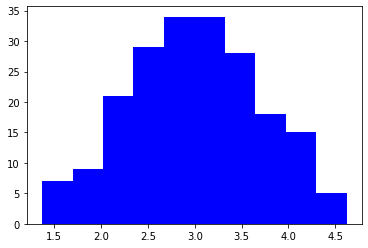

In [73]:
plt.hist(data['package'],bins=10, color='blue')

(array([ 4.,  9., 16., 34., 27., 47., 28., 18., 11.,  6.]),
 array([4.26 , 4.792, 5.324, 5.856, 6.388, 6.92 , 7.452, 7.984, 8.516,
        9.048, 9.58 ]),
 <BarContainer object of 10 artists>)

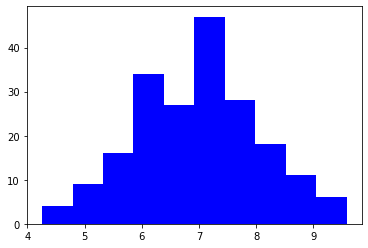

In [74]:
plt.hist(data['cgpa'],bins=10, color='blue')

# Distribution plot for package

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='package', ylabel='Density'>

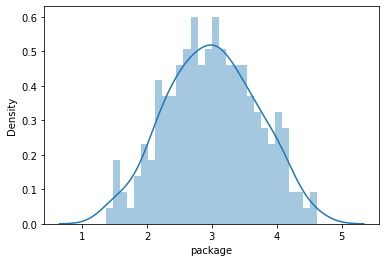

In [75]:
sns.distplot(data['package'], bins=30)

# Distribution plot for cgpa

C:\Users\Ragunathan E S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cgpa', ylabel='Density'>

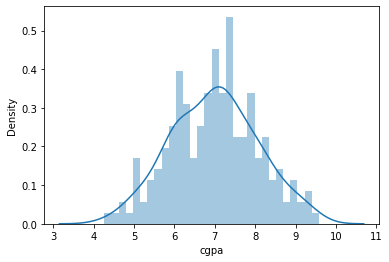

In [76]:
sns.distplot(data['cgpa'], bins=30)

We can use histogram or distplot (distribution plot) to identify whether it is normally distributed or not.

# We also use Shapiro-wilk test to check whether it is normality?

In [77]:
from scipy.stats import shapiro

In [78]:
shapiro(data)

ShapiroResult(statistic=0.9226064682006836, pvalue=1.6845245088149136e-13)

From the output we can see that the test statistic is 0.9226 and the corresponding p-value is 1.6845. Accept Null hupothesis p-value > .05 & Normal distribution.

Since, the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.
This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

# Scatter plot

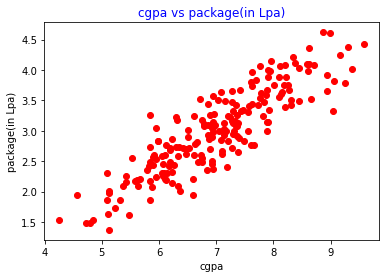

In [79]:
#visualizing the data with a scatter plot

data2 = data

x = data2['cgpa']
y = data2['package']
plt.scatter(x, y, color = 'red')
plt.xlabel("cgpa")
plt.ylabel("package(in Lpa)")
plt.title("cgpa vs package(in Lpa)",color="blue")
plt.show()

Scatter plot, is used to visualize how much our data is scattered.

# Box plot

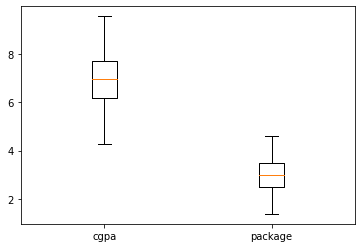

In [80]:
# visualizing the data with a box plot

data1 = [data['cgpa'], data['package']]
plt.boxplot(data1, labels=['cgpa','package'])
plt.show()

While using box plot, we can easily identify the outliers as well as the mean of cgpa and package. Here, there is no outliers so we are proceeding further.

# Creating train and test data

We need to split our data into training and testing sets. Using the training set, we’ll build the
model and perform the model on the testing set. We’ll divide the training and testing sets into
a 80% and 20% ratio, respectively. We’ll split the data by importing train_test_split from the
sklearn.model_selection library. train_test_split is a function for splitting data arrays into two
subsets: for training data and for testing data. With this function, you don’t need to divide the
dataset manually.

By default, Sklearn train_test_split will make random partitions for the two subsets. However,
you can also specify a random state for the operation. The following parameters (arguments) are
included in the train_test_split function. x, y The first parameter is the dataset you’re selecting to
use. train_size This parameter sets the size of the training dataset. There are three options: None,
which is the default, Int, which requires the exact number of samples, and float, which ranges from
0.1 to 1.0. test_size This parameter specifies the size of the testing dataset. The default state suits
the training size. It will be set to 0.25 if the training size is set to default. random_state This
parameter sets the seed for random split and ensures same split is reproducible.

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x, y, train_size = 0.8,test_size = 0.2, random_state = 10)

random_state = np.random can be used for making random sets

In [83]:
x_train

190    6.19
7      6.75
26     8.31
138    7.91
58     6.92
       ... 
113    6.94
64     7.36
15     7.25
125    7.33
9      8.31
Name: cgpa, Length: 160, dtype: float64

In [84]:
y_train

190    2.69
7      2.48
26     3.42
138    3.89
58     3.09
       ... 
113    2.37
64     2.92
15     3.23
125    3.16
9      3.51
Name: package, Length: 160, dtype: float64

# Building the model

There are many libraries to build the linear regression model in python. . sklearn . statsmodels
. tensorflow In this session, we will use statsmodels.api library from statsmodels package to build
the linear regression model.By default, the statsmodels library fits a line that passes through the
origin. But if we observe the simple linear regression equation Y = β0 + β1X, it has an intercept
value as β0. So, to have an intercept, we need to add the add_constant attribute manually.

In [85]:
import statsmodels.api as lm

In [86]:
x_train_lm=lm.add_constant(x_train)

Next, we can build the linear regression model using OLS (Ordinary Least Square) present in the statsmodels.api.

In [87]:
model=lm.OLS(y_train,x_train_lm).fit()

In [88]:
model.params #To print parameter estimates

const   -0.932969
cgpa     0.562394
dtype: float64

The summary of the model is obtained by summary() function. From the summary table, important metrics such as adjusted R-squared, F-statistic & p-value and Durbin-Watson Statistic are observed.

In [89]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                package   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     552.4
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           1.90e-53
Time:                        23:14:22   Log-Likelihood:                -44.865
No. Observations:                 160   AIC:                             93.73
Df Residuals:                     158   BIC:                             99.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9330      0.169     -5.514      0.000      -1.267      -0.599
cgpa           0.5624      0.024     23.504      0.000       0.515       0.610
==============================================================================
Omnibus:                        1.401   Durbin-Watson:                   2.488
Prob(Omnibus):                  0.496   Jarque-Bera (JB):                1.428
Skew:                          -0.155   Prob(JB):                        0.490
Kurtosis:                       2.656   Cond. No.                         47.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

An R-squared result of 70 to 100 indicates that the model explains the ouput well.Here, adjusted
R-squared value is 0.776, which means that 77.6% of the Package variance can be explained by the
cgpa column using this line. p-value for F statistics is less than significance level of 0.05 and it is
concluded that regression coefficents are significant (not equal to zero). Durbin-Watson test is to
check the autocorrelation (correlation of error terms). No autocorrelation is implied by a value of
2, below 2 is positive correlation and above 2 is negative correlation. Usually 1.5 to 2.5 is taken as
a safe choice.

# Visualising the fitted line to train data set

In [90]:
import matplotlib.pyplot as plt

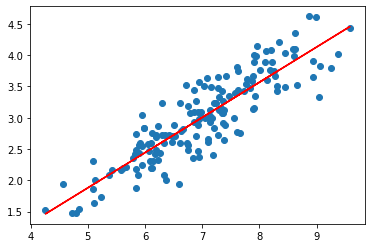

In [91]:
plt.scatter(x_train, y_train)
plt.plot(x_train, -0.9329 + 0.5623*x_train, 'r')
plt.show()

The redline is the fitted regression line (package = -0.9330 + 0.5624cgpa ) for training data.

# Prediction using test data set

In [92]:
x_test_lm = lm.add_constant(x_test)
y_test_pred = model.predict(x_test_lm)
y_test_pred

59     3.318733
5      3.504323
20     3.161262
198    3.358101
52     3.774272
19     3.273741
162    2.177072
55     3.678665
69     3.172510
2      3.464955
98     3.391844
10     2.058969
75     2.986920
142    2.964424
124    2.475141
63     4.218564
109    3.436836
78     2.773210
111    2.115209
185    2.615740
154    3.048784
130    2.823826
61     2.148952
87     3.616802
102    1.952114
121    2.722595
136    2.238935
1      1.946490
47     2.351414
172    2.964424
159    3.965487
39     3.245622
76     2.970048
91     2.565124
35     2.930681
178    3.650546
127    2.880065
169    4.302923
46     2.480765
174    3.183758
dtype: float64

# R2_score
Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

                                         R2= 1- SSres / SStot

In [93]:
from sklearn.metrics import r2_score

In [94]:

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.7681105472626018

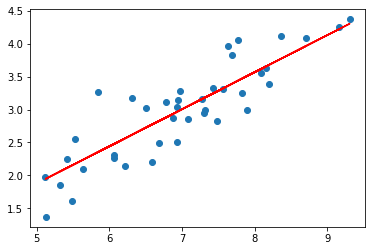

In [95]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.show()

# Implement linear regression using sklearn & performing F-test.

In [96]:
from sklearn.linear_model import LinearRegression
import scipy.stats

We need to change it in array inorder to implement the linear regression using sklearn

In [97]:
x = np.array(data['cgpa']).reshape(-1,1)
y = np.array(data['package']).reshape(-1,1)

In [107]:
#To calculate the variance of X_test and Y_test

print(np.var(x_test),np.var(y_test))

1.2307027499999998 0.5239514166666666


# F-test

In [108]:
def f_test(x_test,y_test):
    f = np.var(x_test, ddof=1)/np.var(y_test, ddof=1)
    nun = x.size-1
    dun = y.size-1
    p_value = 1-scipy.stats.f.cdf(f, nun, dun)
    return f,p_value

#Performing the F-test

f_test(x,y)

(2.3906823712024523, 7.390233980331118e-10)

In [99]:
x_train, x_test,y_train, y_test = train_test_split(x,y,random_state=None, test_size =0.3,shuffle = True)

random_state takes the data in a random manner when given a value and won't change when we run the code again But when random_state = None it changes accordingly

In [100]:
model = LinearRegression()

In [101]:
model.fit(x_train,y_train)

LinearRegression()

In [102]:
y_predict = model.predict(x_test)

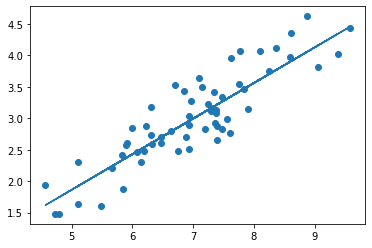

In [103]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predict)

In [104]:
model.score(x_test,y_test)

0.7844650348334683

score in linear regression is used to caclculate the accuracy of the model score calculates R^2 which is a metric of Cost function

# We are calculating the MSE.

This shows the minimized error

In [105]:
from sklearn.metrics import mean_squared_error

In [106]:
mean_squared_error(y_test, y_predict)

0.11292985034020496

# Conclusion

Here, we taken a dataset about the placement cell regarding cgpa and packages. And also we've tested the data with the followings, histogram,box plot,scatter plot and the info of our data (EDA) and we further proceed with train_test_split, model building,Visualising the fitted line to train dataset and prediction using test dataset.